In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

# import the requirements

In [2]:
# to visualize all the columns in the dataframe
pd.pandas.set_option('display.max_columns',None)

# Read the dataset
data=pd.read_csv("C:\\Users\\Saransh Sehrawat\\My Projects\\Internship Credit Risk\\Training_Dataset\\Training_Batch_process.csv")

data.head()

,Unnamed: 0,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,1,2.890372,4,2,6.955593,1,2,4,2,1,4,2,3.044522,3,1,1,3,2,1,2,1
1,1,1,2.197225,4,0,7.937017,1,3,2,3,1,2,1,3.583519,3,1,2,3,1,1,2,1
2,2,2,2.484907,2,9,6.734592,2,4,2,2,1,4,1,3.135494,3,1,1,2,2,1,2,1
3,3,1,2.484907,4,0,7.660114,1,3,3,3,1,2,1,3.663562,3,1,2,2,1,1,1,1
4,4,1,2.302585,4,0,7.714677,1,2,1,3,1,3,1,3.871201,3,1,2,2,1,1,1,1


In [3]:
data.drop(columns=["Unnamed: 0"],inplace=True)

# Feature Selection:

In [4]:
# Feature Selection:
corr=data.corr()
corr


# Co-relation Matrix to check the multi-colinearity 

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
status,1.000000,-0.062359,0.200746,0.048367,-0.024779,0.194128,0.124235,0.011159,0.037605,-0.149470,-0.050166,-0.025172,0.074267,0.075229,0.010417,0.078500,0.045783,0.017806,0.069530,0.034981,0.338864
duration,-0.062359,1.000000,-0.093585,0.110486,0.621135,0.055698,0.045894,0.133761,0.002841,-0.029510,0.052763,0.317090,-0.028037,-0.061943,0.147348,-0.030651,0.229859,0.077205,0.183926,0.177296,-0.187646
credit_history,0.200746,-0.093585,1.000000,-0.084822,-0.026577,0.035090,0.128223,0.030229,0.028785,-0.031270,0.092603,-0.038588,0.183241,0.194204,0.054755,0.450637,0.010358,-0.018131,0.053842,-0.001099,0.229800
purpose,0.048367,0.110486,-0.084822,1.000000,0.020699,-0.017706,0.036595,0.043147,-0.019936,-0.006199,-0.031865,0.010090,0.014714,-0.099491,0.037090,0.051137,-0.006346,0.037829,0.074890,0.117252,-0.023707
amount,-0.024779,0.621135,-0.026577,0.020699,1.000000,0.066837,-0.025612,-0.313154,-0.019054,-0.020900,0.025238,0.331311,0.017309,-0.002872,0.129529,-0.031109,0.293693,-0.049103,0.266722,0.040197,-0.080284
savings,0.194128,0.055698,0.035090,-0.017706,0.066837,1.000000,0.136748,0.019063,0.007841,-0.115848,0.080951,0.019604,0.084051,0.022783,-0.013802,-0.051418,-0.000767,-0.022125,0.093448,-0.019944,0.161292
employment_duration,0.124235,0.045894,0.128223,0.036595,-0.025612,0.136748,1.000000,0.139715,0.092085,-0.016063,0.238146,0.091126,0.270343,-0.014281,0.098030,0.112053,0.108581,-0.127112,0.091812,0.042701,0.113270
installment_rate,0.011159,0.133761,0.030229,0.043147,-0.313154,0.019063,0.139715,1.000000,0.122127,0.003414,0.057500,0.064126,0.077052,-0.003730,0.095744,0.033783,0.113897,0.097828,0.018358,0.105954,-0.080210
personal_status_sex,0.037605,0.002841,0.028785,-0.019936,-0.019054,0.007841,0.092085,0.122127,1.000000,0.026368,-0.046932,-0.002655,0.018140,-0.044485,0.096432,0.045938,0.014435,-0.142611,0.024519,-0.085654,0.043531
other_debtors,-0.149470,-0.029510,-0.031270,-0.006199,-0.020900,-0.115848,-0.016063,0.003414,0.026368,1.000000,-0.016545,-0.149506,-0.040318,-0.031670,-0.056457,-0.023929,-0.046642,-0.001280,-0.085703,-0.145788,0.010696


<AxesSubplot:>

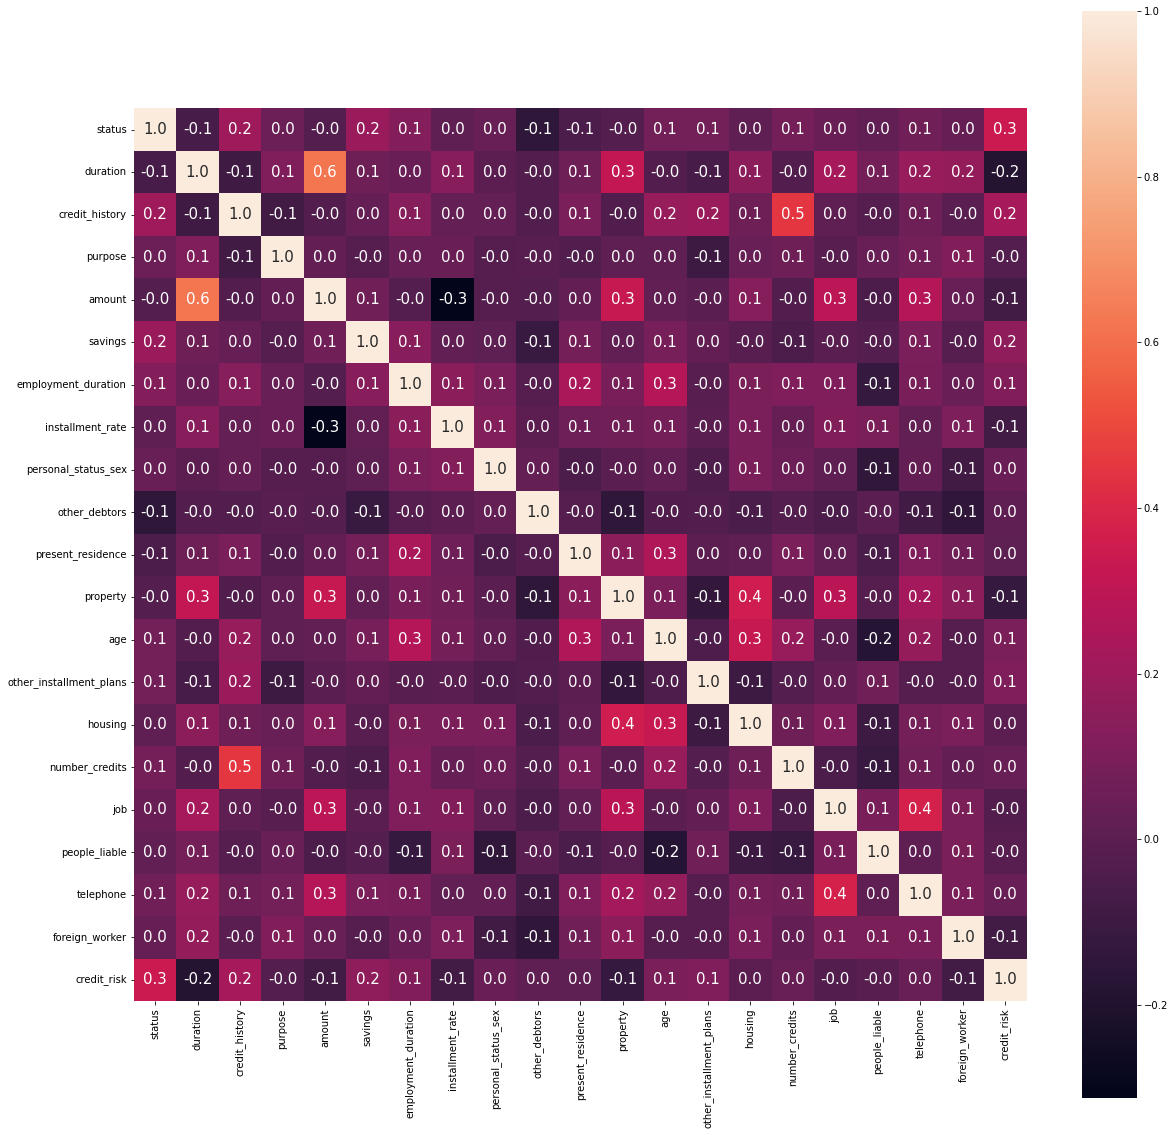

In [5]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15})

In [6]:
threshold=0.7
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
correlation(data.iloc[:,:-1],threshold)

set()

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif #ANOVA(F-TEST)


# Separate the target column the from the dataset
X = data.drop(columns=['credit_risk'])
y=data["credit_risk"] 

print("Feature data dimension: ", X.shape)

### Apply SelectKBest Algorithm
ordered_rank_features=SelectKBest(score_func=f_classif,k=20)
ordered_feature=ordered_rank_features.fit(X,y)

#create a dataframe
dfscores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']
lst=features_rank.sort_values(by=["Score"],ascending=False)

print("Feature listed by socore:","\n",lst,"\n")
print("Top 10 Features are :","\n",features_rank.nlargest(10,'Score'))
#By using SelectKbest method findding the top 10 features:

Feature data dimension:  (800, 20)
Feature listed by socore: 
                    Features       Score
0                    status  103.520610
2            credit_history   44.490068
1                  duration   29.123758
5                   savings   21.314446
11                 property   12.951793
6       employment_duration   10.371529
13  other_installment_plans    9.587006
12                      age    8.317643
4                    amount    5.176872
7          installment_rate    5.167261
19           foreign_worker    4.974140
8       personal_status_sex    1.515033
18                telephone    1.265790
15           number_credits    1.240575
16                      job    0.694743
3                   purpose    0.448758
9             other_debtors    0.091301
17            people_liable    0.050776
10        present_residence    0.021995
14                  housing    0.001496 

Top 10 Features are : 
                    Features       Score
0                    status  10

**Note: Applying SelectKbest Method Based on the score select the top 10 Features which are relevant to our model.**